### Initial Set Up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
import re
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Remove dataFrame display size restrictions
pd.set_option("display.max_rows", None, "display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")

#import data with user descriptiomns/review

path = "/Users/alisonsadel/Desktop/master_data_file/Project 3/csv/combined_scores.csv"
df = pd.read_csv(path)

### Create wordCloud

In [2]:
# Only make word cloud with using Titles with more than 2 Nomination
df_filter = df[df['No'] > 2]  
df_filter

,Index,Title,No,IMDb,Rotten_Tomatoes
0,0,game of thrones,30,NaN,NaN
1,1,veep,24,8.3,9.3
2,2,the marvelous mrs maisel,21,NaN,NaN
3,3,saturday night live,20,8.1,NaN
4,4,handmaid's tale,20,NaN,NaN
5,5,better call saul,17,8.7,9.7
6,6,ozark,17,8.4,8.1
7,7,the crown,17,8.7,8.9
8,8,barry,15,NaN,NaN
9,9,fargo,14,8.9,9.6


(-0.5, 1599.5, 799.5, -0.5)

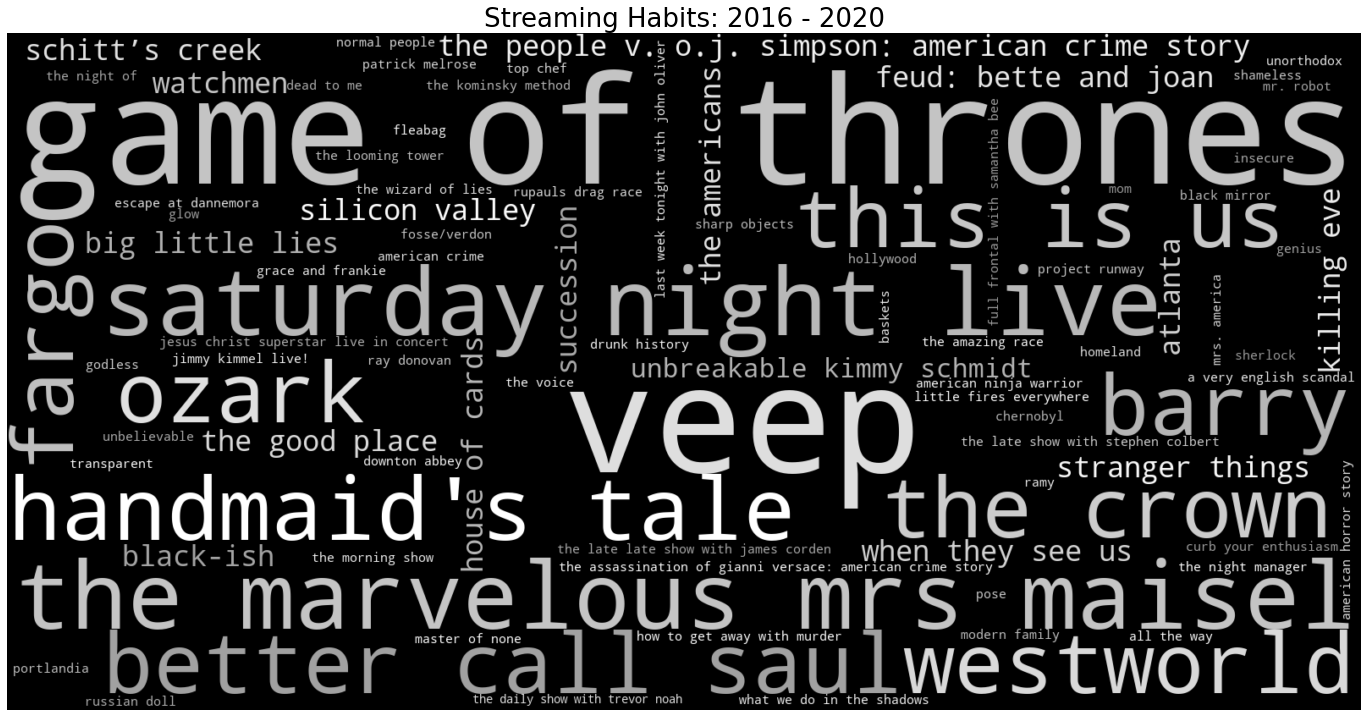

In [3]:
# Testing wordcloud with filter of 1+ nominations
texter = " ".join(review for review in df_filter.Title)

import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# Adding the stopwords
stopwords = set(STOPWORDS)
stopwords.update(["Show"])

#convert list to string and generate
unique_string=(" ").join(review for review in df.Title if review not in stopwords)

# Base display on Term frequency
from collections import Counter
word_could_dict=Counter(df_filter.Title)
wordcloud = WordCloud(width = 1600, height = 800, stopwords=stopwords).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(20,10))
plt.title("Streaming Habits: 2016 - 2020", fontsize=26)
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
interpolation="bilinear")
plt.margins(x=0, y=0)
plt.tight_layout(pad=0)
plt.axis("off")

#plt.savefig('wordcloud_shows.png')

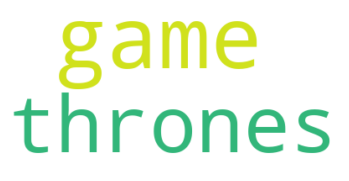

In [4]:
# Start with one review - 0th item in index:
text = df.Title[0]

# Create and generate a word cloud image:
wordcloud = WordCloud( background_color="white").generate(text) 

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
text = " ".join(review for review in df.Title)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 3066 words in the combination of all review.


In [6]:
texter = " ".join(review for review in df.Title)

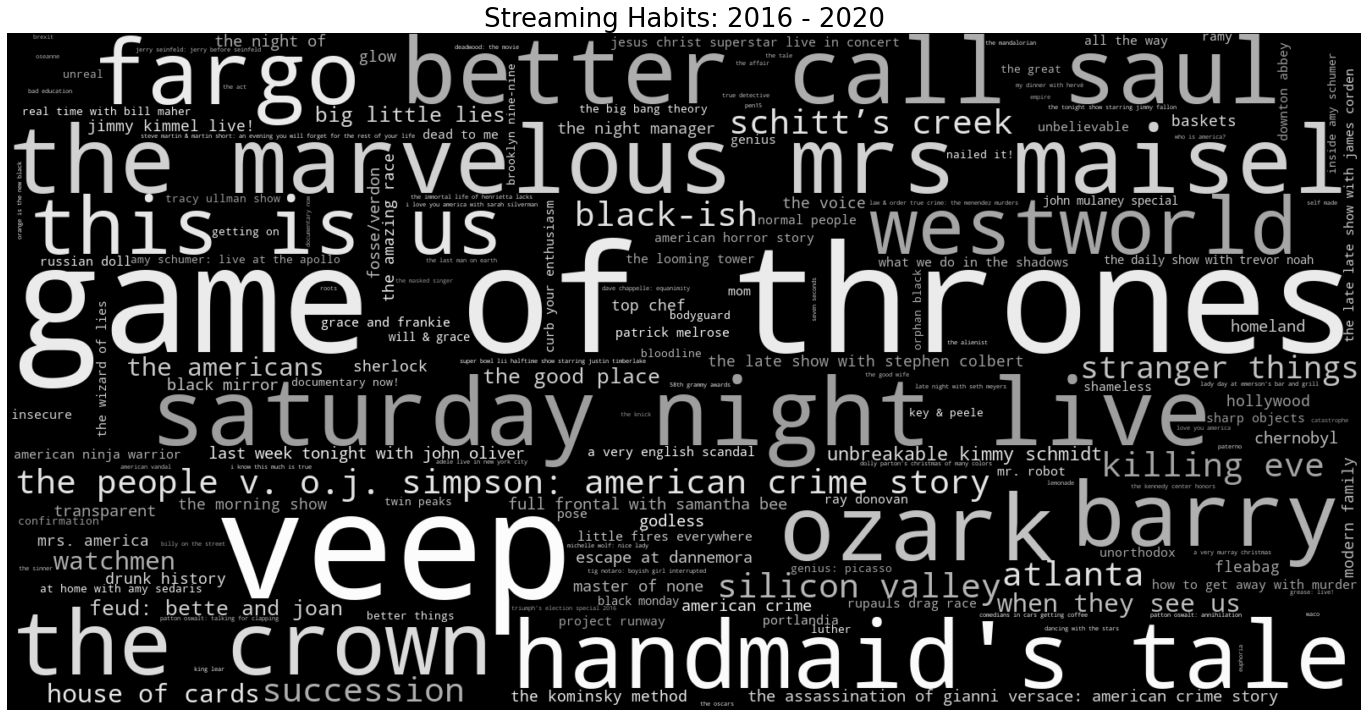

In [7]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# Adding the stopwords
stopwords = set(STOPWORDS)
stopwords.update(["Show"])

#convert list to string and generate
unique_string=(" ").join(review for review in df.Title if review not in stopwords)

# Base display on Term frequency
from collections import Counter
word_could_dict=Counter(df.Title)
wordcloud = WordCloud(width = 1600, height = 800, stopwords=stopwords).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(20,10))
plt.title("Streaming Habits: 2016 - 2020", fontsize=26)
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
interpolation="bilinear")
plt.margins(x=0, y=0)
plt.tight_layout(pad=0)
plt.axis("off")

plt.savefig('wordcloud_shows.png')